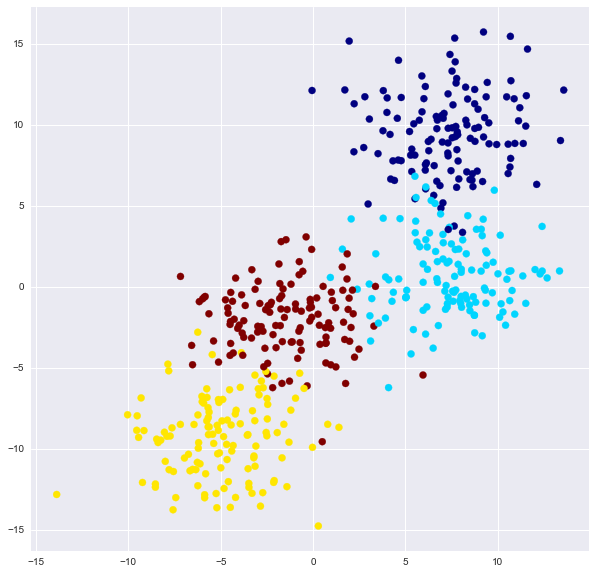

In [6]:
# coding: UTF-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

from sklearn.datasets import make_blobs # ダミーデータの生成用
X, y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)
# n_samples:サンプル数 centers:中心点の数 random_state:seed値 cluster_std: ばらつき度合い

plt.figure(figsize =(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

NameError: name 'visualize_tree' is not defined

In [9]:
# 決定木を描画してみる
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    """決定木の可視化関数。
    INPUTS: 分類モデル, X, y, optional x/y limits.
    OUTPUTS: Meshgridを使った決定木の可視化
    """
    # fitを使ったモデルの構築
    classifier.fit(X, y)

    # 軸を自動調整
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim


    # meshgridをつくる。
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),np.linspace(y_min, y_max, 100))

    # 分類器の予測を実行
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # meshgridを使って整形。
    Z = Z.reshape(xx.shape)

    # 分類ごとに色付け。
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')

    # 訓練データの描画。
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    def plot_boundaries(i, xlim, ylim):
        '''
        境界線を描き込みます。
        '''
        if i < 0:
            return

        tree = classifier.tree_

        # 境界を描画するために、再帰的に呼び出します。
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i], [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i], [tree.threshold[i], xlim[1]], ylim)

        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])

    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())


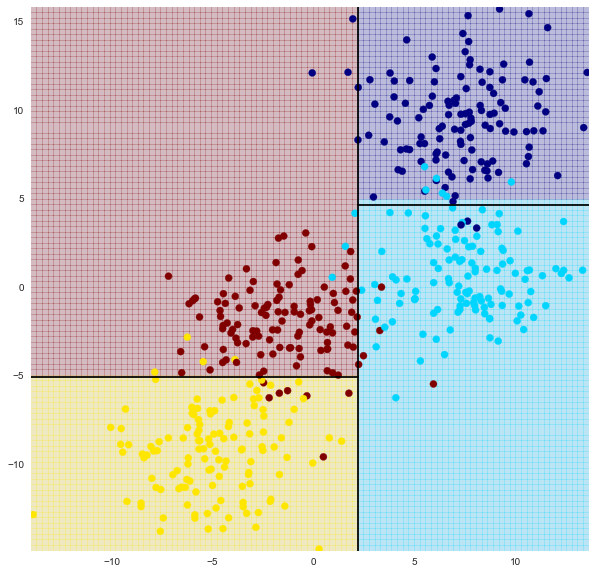

In [10]:
from sklearn.tree import DecisionTreeClassifier             # 決定木用
clf = DecisionTreeClassifier(max_depth=2, random_state = 0) # インスタンス作成 max_depth:木の深さ
visualize_tree(clf, X, y)    # 描画実行

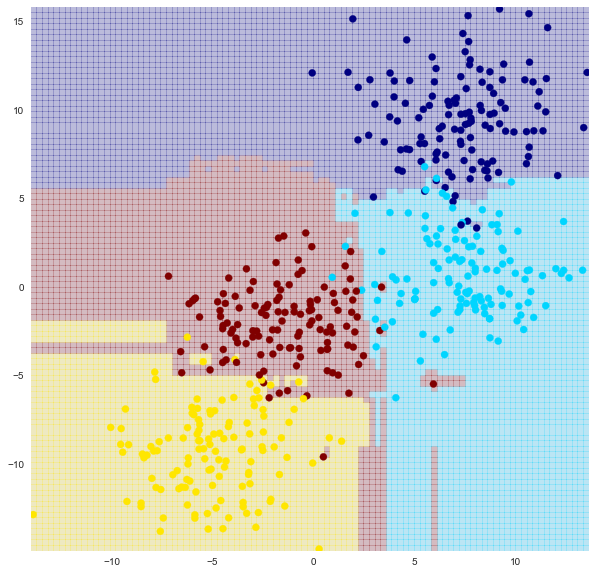

In [11]:
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト用
clf = RandomForestClassifier(n_estimators=100, random_state=0) # インスタンス作成　n_estimators:作る決定木の数の指定
visualize_tree(clf, X, y, boundaries=False)